# Introduction to Numpy and Pandas

## Warmup

Run the following lines in the cell below:

```
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
```

In [3]:
# imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn


🛑 For the following question, you cannot use loops (`for`, `while`). _You shouldn't be using loops with pandas. It's time to break the habit... **before it becomes one!**_ 

## Exercise 1: DataFrame basics

Consider the following Python dictionary `data` and Python list `labels` (This is just some meaningless data I made up with the theme of animals and trips to a vet):

In [2]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [4]:
# 1.1 Create a DataFrame df from this dictionary data which has the index labels.
df = pd.DataFrame(data=data, index=labels)
df



,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [20]:
# 1.2 Select only the rows where visits are 3 or more. Which types of animals are these?
visitsAtLeast3 = df.loc[df.visits>=3]
grp = visitsAtLeast3.groupby('animal')
grp.apply(print)

#The 2 types of animal going 3 times or more to the vet are cats and dogs


  animal  age  visits priority
b    cat  3.0       3      yes
f    cat  2.0       3       no
  animal  age  visits priority
d    dog  NaN       3      yes


""


In [23]:
# 1.3 Select the rows where visits are 3 and the animal is a cat
visits3AndAnimalCat = df.loc[(df.animal=='cat') & (df.visits == 3)]
visits3AndAnimalCat


,animal,age,visits,priority
b,cat,3.0,3,yes
f,cat,2.0,3,no


In [26]:
# 1.4 Calculate the sum of all visits in df (i.e. the total number of visits).

df.visits.sum()

19

In [32]:
# 1.5 Calculate the mean age for each different animal in df.

animalsMeanAge = df.groupby('animal')['age'].mean()
animalsMeanAge

animal
cat      2.5
dog      5.0
snake    2.5
Name: age, dtype: float64

In [67]:
# 1.6 Append a new row 'k' to df with your choice of values for each column. 
#Then delete that row to return the original DataFrame.

#1- Appending new row:
dic = {'animal': 'ostrich' , 'age': 50 , 'visits':1 , 'priority':'no'}
labels = ['k']

new_df_row = pd.DataFrame(data=dic, index=labels)
df_newColK = pd.concat([df,new_df_row], axis=0)
df_newColK

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [68]:
#Then delete that row to return the original DataFrame.
#2- deleting the previously added row
df_newColK.drop('k')

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


## Exercise 2: Iris Dataset Activity

For this exercise, you will need to load dataset from the `Iris_Data.csv` file located in `data/`.

_Hint: Use pandas "read" method._

In [74]:
# 2.1
# Load the data and assign it to a variable df
# print it out to verify that it is loaded. - pd.read_csv()
df2 = pd.read_csv('../data/Iris_Data.csv')
df2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 2.2

Create 4 box plots comparing sepal length, sepal width, petal length and petal width of the different species of iris.

_HINT: To create boxplots you can you the code below. Make the appropriate changes to the column value, the Title and the ylabel of your graph._

```
df.boxplot(column = "Column_To_Graph", by = 'species')
plt.suptitle('')
plt.title("_____ by Species")
plt.ylabel("________")
plt.show()
```

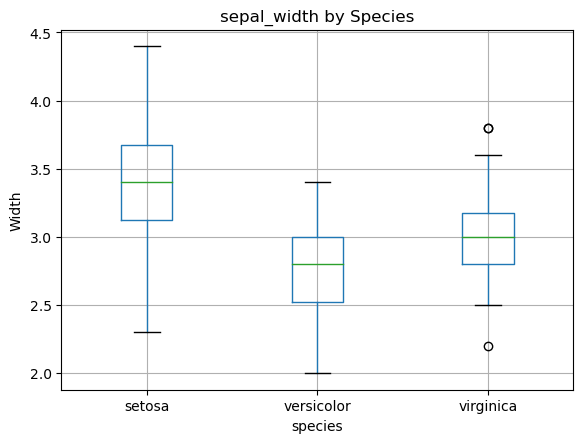

,sepal_width,species,lowerFence,upperFence
119,2.2,virginica,2.4375,NaN
109,3.6,virginica,NaN,3.5625
117,3.8,virginica,NaN,3.5625
131,3.8,virginica,NaN,3.5625


In [196]:
# 2.2 boxplot 2
df2.boxplot(column = ['sepal_width'], by = 'species')
plt.suptitle('')
plt.title("sepal_width by Species")
plt.ylabel("Width")
plt.show()

#Preparation for question 2.3 : Search for outliers 
#A- Search Outliers for VIRGINICA
outlier1virginica =df2.loc[df2.species=='virginica']
outlier1virginica.sepal_width.describe()
# The .describe() function for sepal_width column on 'virginica' indicates:
Q1 =  2.800000
Q2 =  3.000000
Q3 =  3.175000
IQR = Q3-Q1
upperFenceVirginica = Q2 + 1.5*IQR
lowerFenceVirginica = Q2 - 1.5*IQR

#Anything outside the range [LowerFence, upperFence] is an outlier
lowerFenceOutlier1virginica = outlier1virginica.loc[outlier1virginica.sepal_width<lowerFenceVirginica]
upperFenceOutlier1virginica = outlier1virginica.loc[outlier1virginica.sepal_width>upperFenceVirginica]

#Display purpose: 
lowerOutlierVirginica = lowerFenceOutlier1virginica.loc[:,['sepal_width','species']]
lowerOutlierVirginica['lowerFence']=lowerFenceVirginica
upperOutlierVirginica = upperFenceOutlier1virginica.loc[:,['sepal_width','species']]
upperOutlierVirginica['upperFence']=upperFenceVirginica

resultOutliers1Virginica = pd.concat([lowerOutlierVirginica,upperOutlierVirginica])
resultOutliers1Virginica







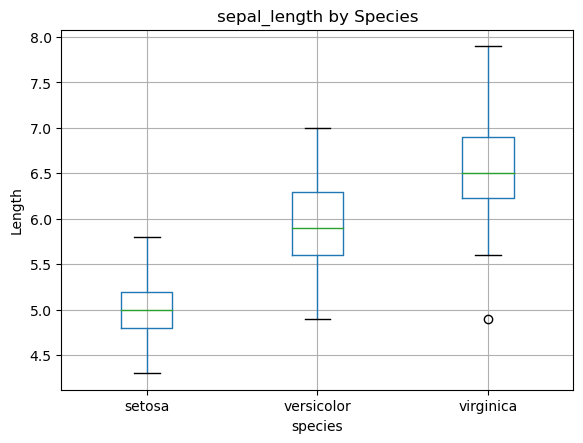

,sepal_length,species,outlier,LowerFence
106,4.9,virginica,LowerOutlier,5.4875


In [192]:
# 2.2 boxplot 1
#help(df2.boxplot)

df2.boxplot(column = ['sepal_length'], by = 'species')
plt.suptitle('')
plt.title("sepal_length by Species")
plt.ylabel("Length")
plt.show()


#Preparation for question 2.3 : Search for outliers 
#A- Search Outliers for VIRGINICA
outlier2virginica =df2.loc[df2.species=='virginica']
outlier2virginica.sepal_length.describe()
# The .describe() function for sepal_length column on 'virginica' indicates:
Q1 = 6.22500
Q2 = 6.50000
Q3 = 6.90000
IQR = Q3 - Q1
lowerFence = Q2 - 1.5*IQR
#Anything under LowerFence is an Outlier
lowerFenceOutlier2virginica = outlier2virginica.loc[outlier2virginica.sepal_length<lowerFence]
#Display purpose: 
resultOutlier2virginica =lowerFenceOutlier2virginica.loc[:,['sepal_length','species']]
resultOutlier2virginica['outlier']='LowerOutlier'
resultOutlier2virginica['LowerFence']=lowerFence
resultOutlier2virginica


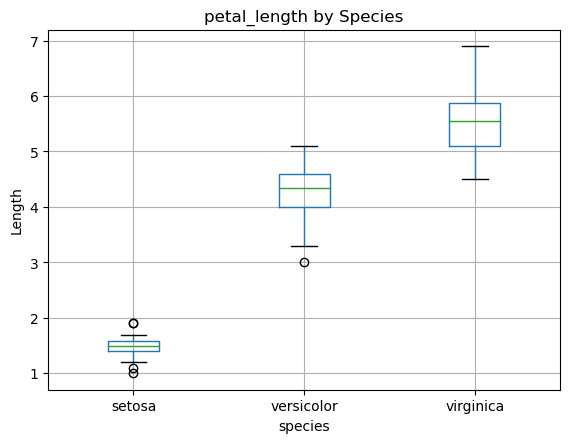

,petal_length,species,outlier,LowerFence,UpperFence
13,1.1,setosa,LowerOutlier,1.2375,NaN
14,1.2,setosa,LowerOutlier,1.2375,NaN
22,1.0,setosa,LowerOutlier,1.2375,NaN
35,1.2,setosa,LowerOutlier,1.2375,NaN
24,1.9,setosa,UpperOutlier,NaN,1.7625
44,1.9,setosa,UpperOutlier,NaN,1.7625
57,3.3,versicolor,LowerOutlier,3.4500,NaN
93,3.3,versicolor,LowerOutlier,3.4500,NaN
98,3.0,versicolor,LowerOutlier,3.4500,NaN


In [193]:
# 2.2 boxplot 3
df2.boxplot(column = ['petal_length'], by = 'species')
plt.suptitle('')
plt.title("petal_length by Species")
plt.ylabel("Length")
plt.show()



#Preparation for question 2.3 : Search for outliers 

#A- Search Outliers for SETOSA
outlier3setosa =df2.loc[df2.species=='setosa']
outlier3setosa.petal_length.describe()

#The .describe() function for petal_length column on 'setosa' indicates:
Q1 = 1.400000
Q2 = outlier3setosa.petal_length.median()
Q3 = 1.575000
# - Therefore we can calculate the IQR -
#IQR: InterQuartile Range is the interval between Q3-Q1
#The Upper Fence= Q2 + 1.5IQR
#The Lower Fence= Q2 - 1.5IQR
#The outliers are Above the UpperFence and Under the LowerFence

IQR = Q3-Q1
LowerFence = Q2-1.5*IQR
UpperFence = Q2+1.5*IQR

#Anything outside the range [LowerFence, UpperFence] is an Outlier
lowerFenceOutlier3setosa = outlier3setosa.loc[outlier3setosa.petal_length<LowerFence]
upperFenceOutlier3setosa = outlier3setosa.loc[outlier3setosa.petal_length>UpperFence]

#Display purpose: 
lower =lowerFenceOutlier3setosa.loc[:,['petal_length','species']]
lower['outlier']='LowerOutlier'
lower['LowerFence']= LowerFence
upper = upperFenceOutlier3setosa.loc[:,['petal_length','species']]
upper['outlier']='UpperOutlier'
upper['UpperFence']= UpperFence
#Concatenation of the upper and lower displays into the same dataframe
resultOutliers_setosa = pd.concat([lower,upper])
resultOutliers_setosa



#B- Search outliers for VERSICOLOR
outlier3versicolor =df2.loc[df2.species=='versicolor']
outlier3versicolor.petal_length.describe()

#the .describe() function on petal_length for 'versicolor' indicates:
#Q1 : 25%  = 4.000000
#Q2 : 50%  = 4.350000
#Q3 : 75%  = 4.600000

Q1 = 4.000000
Q2 = 4.350000
Q3 = 4.600000
IQR = Q3-Q1
lowerFence_versicolor = Q2-1.5*IQR
#Anything under LowerFence is an Outlier
lowerFenceOutlier3_versicolor = outlier3versicolor.loc[outlier3versicolor.petal_length<lowerFence_versicolor]
lower_versicolor = lowerFenceOutlier3_versicolor.loc[:,['petal_length','species']]
lower_versicolor['outlier']='LowerOutlier'
lower_versicolor['LowerFence']=lowerFence_versicolor
lower_versicolor
resultOutliers3 = pd.concat([resultOutliers_setosa, lower_versicolor])
resultOutliers3




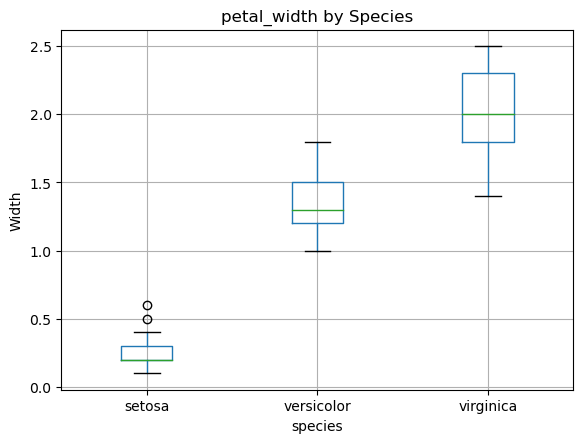

,petal_width,species,outlier,UpperFence
5,0.4,setosa,UpperOutlier,0.35
15,0.4,setosa,UpperOutlier,0.35
16,0.4,setosa,UpperOutlier,0.35
21,0.4,setosa,UpperOutlier,0.35
23,0.5,setosa,UpperOutlier,0.35
26,0.4,setosa,UpperOutlier,0.35
31,0.4,setosa,UpperOutlier,0.35
43,0.6,setosa,UpperOutlier,0.35
44,0.4,setosa,UpperOutlier,0.35


In [199]:
# 2.2 boxplot 4
df2.boxplot(column = ['petal_width'], by = 'species')
plt.suptitle('')
plt.title("petal_width by Species")
plt.ylabel("Width")
plt.show()

df2.petal_width.describe()

#A- Search Outliers for SETOSA
outlier4setosa =df2.loc[df2.species=='setosa']
outlier4setosa.petal_width.describe()

#The .describe() function for petal_width column on 'setosa' indicates:
Q1 = 0.20000
Q2 = 0.20000
Q3 = 0.30000
IQR = Q3-Q1
upperFenceSetosa = Q2 + 1.5*IQR

#Anything above upperFence is an Outlier
upperFenceOutlier4_setosa = outlier4setosa.loc[outlier4setosa.petal_width>upperFenceSetosa]
#Display purpose
resultUpperOultier4setosa = upperFenceOutlier4_setosa.loc[:,['petal_width','species']]
resultUpperOultier4setosa['outlier']= 'UpperOutlier'
resultUpperOultier4setosa['UpperFence']= upperFenceSetosa

resultUpperOultier4setosa








### 2.3

In the following text cell, write which species had outliers in their boxplot and for what variable.

# _Write Answer Here_



#NOTE : See the algorithm that brought up these results in the answers section 2.2 above



- SEPAL_WIDTH OUTLIERS - 
    sepal_width	species	 lowerFence	upperFence
119	     2.2	virginica	2.4375	NaN
109	     3.6	virginica	NaN	    3.5625
117	     3.8	virginica	NaN	    3.5625
131	     3.8	virginica	NaN	    3.5625

- SEPAL_LENGTH OUTLIERS - 
        sepal_length species	  outlier	    LowerFence
106	     4.9	      virginica	  LowerOutlier	5.4875

- PETAL_LENGTH OUTLIERS -
    petal_length	species	    outlier	      LowerFence	UpperFence
13	     1.1	    setosa	    LowerOutlier	1.2375	    NaN
14	     1.2    	setosa	    LowerOutlier	1.2375	    NaN
22	     1.0	    setosa	    LowerOutlier	1.2375	    NaN
35	     1.2	    setosa	    LowerOutlier	1.2375	    NaN
24	     1.9    	setosa	    UpperOutlier	 NaN	    1.7625
44	     1.9	    setosa	    UpperOutlier	 NaN	    1.7625
57	     3.3	    versicolor	LowerOutlier	3.4500	    NaN
93	     3.3	    versicolor	LowerOutlier	3.4500	    NaN
98	     3.0	    versicolor	LowerOutlier	3.4500	    NaN

- PETAL_WIDTH OUTLIERS -
    petal_width	species	  outlier	    UpperFence
5	  0.4	    setosa	UpperOutlier	0.35
15	  0.4	    setosa	UpperOutlier	0.35
16	  0.4	    setosa	UpperOutlier	0.35
21	  0.4	    setosa	UpperOutlier	0.35
23	  0.5	    setosa	UpperOutlier	0.35
26	  0.4	    setosa	UpperOutlier	0.35
31	  0.4	    setosa	UpperOutlier	0.35
43	  0.6	    setosa	UpperOutlier	0.35
44	  0.4	    setosa	UpperOutlier	0.35



Run the cell below. The output should be a scatter plot of sepal lengths of each iris species. The Sepal length entries for the Setosa species however will be red.

In [ ]:
fig, ax = plt.subplots()
colors = {'setosa':'red', 'versicolor':'blue', 'virginica':'blue'}
ax.scatter(np.linspace(0,len(df['sepal_length']),len(df['sepal_length'])),df['sepal_length'], c=df['species'].apply(lambda x: colors[x]))
ax.set_xticks([])
plt.ylabel("Sepal Length")
plt.legend(df['species'])
plt.show()

## Exercise 3: Covid-19 Reporting

Run the cell below. We will be working with data on weekly reported Covid-19 cases in Toronto. 

In [209]:
covid = pd.read_csv('../data/COVID19_cases.csv')
covid.head()


,Age Group,Assigned_ID,Classification,Client Gender,Currently Hospitalized,Currently Intubated,Currently in ICU,Episode Date,Ever Hospitalized,Ever Intubated,Ever in ICU,FSA,Neighbourhood Name,Outbreak Associated,Outcome,Reported Date,Source of Infection,_id
0,20 to 29 Years,276483,CONFIRMED,FEMALE,No,No,No,2022-01-18T00:00:00,No,No,No,M1E,Guildwood,Sporadic,RESOLVED,2022-01-22T00:00:00,No Information,269053
1,20 to 29 Years,276484,CONFIRMED,FEMALE,No,No,No,2022-01-20T00:00:00,No,No,No,M1G,Morningside,Sporadic,RESOLVED,2022-01-22T00:00:00,No Information,269054
2,50 to 59 Years,276485,CONFIRMED,FEMALE,No,No,No,2022-01-21T00:00:00,No,No,No,M1G,Woburn,Sporadic,RESOLVED,2022-01-22T00:00:00,No Information,269055
3,70 to 79 Years,276486,CONFIRMED,FEMALE,No,No,No,2022-01-21T00:00:00,No,No,No,M4S,Mount Pleasant West,Sporadic,RESOLVED,2022-01-22T00:00:00,No Information,269056
4,30 to 39 Years,276487,CONFIRMED,FEMALE,No,No,No,2022-01-21T00:00:00,No,No,No,NaN,NaN,Outbreak Associated,RESOLVED,2022-01-22T00:00:00,"Outbreaks, Healthcare Institutions",269057


In [210]:
# Call the 'Neighbourhood Name' column
covid['Neighbourhood Name']


0                   Guildwood
1                 Morningside
2                      Woburn
3         Mount Pleasant West
4                         NaN
                 ...         
292380                Bendale
292381            Dorset Park
292382              West Hill
292383        Agincourt North
292384     Caledonia-Fairbank
Name: Neighbourhood Name, Length: 292385, dtype: object

In [211]:
# Call every second row in the data frame.
covid.loc[covid.index%2==0]

,Age Group,Assigned_ID,Classification,Client Gender,Currently Hospitalized,Currently Intubated,Currently in ICU,Episode Date,Ever Hospitalized,Ever Intubated,Ever in ICU,FSA,Neighbourhood Name,Outbreak Associated,Outcome,Reported Date,Source of Infection,_id
0,20 to 29 Years,276483,CONFIRMED,FEMALE,No,No,No,2022-01-18T00:00:00,No,No,No,M1E,Guildwood,Sporadic,RESOLVED,2022-01-22T00:00:00,No Information,269053
2,50 to 59 Years,276485,CONFIRMED,FEMALE,No,No,No,2022-01-21T00:00:00,No,No,No,M1G,Woburn,Sporadic,RESOLVED,2022-01-22T00:00:00,No Information,269055
4,30 to 39 Years,276487,CONFIRMED,FEMALE,No,No,No,2022-01-21T00:00:00,No,No,No,NaN,NaN,Outbreak Associated,RESOLVED,2022-01-22T00:00:00,"Outbreaks, Healthcare Institutions",269057
6,30 to 39 Years,276489,CONFIRMED,MALE,No,No,No,2022-01-18T00:00:00,No,No,No,M4C,Taylor-Massey,Sporadic,RESOLVED,2022-01-22T00:00:00,No Information,269059
8,30 to 39 Years,276491,CONFIRMED,FEMALE,No,No,No,2022-01-21T00:00:00,No,No,No,M3C,NaN,Sporadic,RESOLVED,2022-01-22T00:00:00,No Information,269061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292376,20 to 29 Years,252898,CONFIRMED,MALE,No,No,No,2022-01-08T00:00:00,No,No,No,NaN,NaN,Sporadic,RESOLVED,2022-01-08T00:00:00,No Information,245900
292378,60 to 69 Years,252900,CONFIRMED,FEMALE,No,No,No,2022-01-07T00:00:00,Yes,Yes,Yes,M1E,Guildwood,Sporadic,RESOLVED,2022-01-08T00:00:00,No Information,245902
292380,40 to 49 Years,252902,CONFIRMED,MALE,No,No,No,2022-01-06T00:00:00,No,No,No,M1J,Bendale,Sporadic,RESOLVED,2022-01-08T00:00:00,No Information,245904
292382,19 and younger,252904,CONFIRMED,MALE,No,No,No,2022-01-08T00:00:00,No,No,No,M1E,West Hill,Sporadic,RESOLVED,2022-01-08T00:00:00,No Information,245906


In [213]:
# Call every third entry in the "Source of Infection" column.
srcOfInfectionToSerie = covid['Source of Infection']
srcOfInfectionToSerie.loc[srcOfInfectionToSerie.index%3==0]


0                             No Information
3                             No Information
6                             No Information
9                             No Information
12                            No Information
                         ...                
292371                        No Information
292374    Outbreaks, Healthcare Institutions
292377                        No Information
292380                        No Information
292383                        No Information
Name: Source of Infection, Length: 97462, dtype: object

Call all rows in the dataframe where the infected patient was female. Then call all rows in the dataframe where the patient was male, ever hospitalized and in their 60s.


In [215]:
# Call all rows in the dataframe where the infected patient was female.
infectedFemale = covid.loc[covid['Client Gender']=='FEMALE']
infectedFemale


,Age Group,Assigned_ID,Classification,Client Gender,Currently Hospitalized,Currently Intubated,Currently in ICU,Episode Date,Ever Hospitalized,Ever Intubated,Ever in ICU,FSA,Neighbourhood Name,Outbreak Associated,Outcome,Reported Date,Source of Infection,_id
0,20 to 29 Years,276483,CONFIRMED,FEMALE,No,No,No,2022-01-18T00:00:00,No,No,No,M1E,Guildwood,Sporadic,RESOLVED,2022-01-22T00:00:00,No Information,269053
1,20 to 29 Years,276484,CONFIRMED,FEMALE,No,No,No,2022-01-20T00:00:00,No,No,No,M1G,Morningside,Sporadic,RESOLVED,2022-01-22T00:00:00,No Information,269054
2,50 to 59 Years,276485,CONFIRMED,FEMALE,No,No,No,2022-01-21T00:00:00,No,No,No,M1G,Woburn,Sporadic,RESOLVED,2022-01-22T00:00:00,No Information,269055
3,70 to 79 Years,276486,CONFIRMED,FEMALE,No,No,No,2022-01-21T00:00:00,No,No,No,M4S,Mount Pleasant West,Sporadic,RESOLVED,2022-01-22T00:00:00,No Information,269056
4,30 to 39 Years,276487,CONFIRMED,FEMALE,No,No,No,2022-01-21T00:00:00,No,No,No,NaN,NaN,Outbreak Associated,RESOLVED,2022-01-22T00:00:00,"Outbreaks, Healthcare Institutions",269057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292375,60 to 69 Years,252897,CONFIRMED,FEMALE,No,No,No,2021-12-28T00:00:00,No,No,No,M1V,Steeles,Sporadic,RESOLVED,2022-01-08T00:00:00,No Information,245899
292377,40 to 49 Years,252899,CONFIRMED,FEMALE,No,No,No,2022-01-08T00:00:00,No,No,No,M4H,Thorncliffe Park,Sporadic,RESOLVED,2022-01-08T00:00:00,No Information,245901
292378,60 to 69 Years,252900,CONFIRMED,FEMALE,No,No,No,2022-01-07T00:00:00,Yes,Yes,Yes,M1E,Guildwood,Sporadic,RESOLVED,2022-01-08T00:00:00,No Information,245902
292381,90 and older,252903,CONFIRMED,FEMALE,No,No,No,2022-01-05T00:00:00,No,No,No,M1P,Dorset Park,Outbreak Associated,RESOLVED,2022-01-08T00:00:00,"Outbreaks, Healthcare Institutions",245905


In [219]:
# Call all rows in the dataframe where the patient was male, ever hospitalized and in their 60s.
infectedMale60evrHospitalized = covid.loc[(covid['Client Gender']=='MALE')  &  (covid['Ever Hospitalized']=='Yes')  & (covid['Age Group']=='60 to 69 Years')]
infectedMale60evrHospitalized

,Age Group,Assigned_ID,Classification,Client Gender,Currently Hospitalized,Currently Intubated,Currently in ICU,Episode Date,Ever Hospitalized,Ever Intubated,Ever in ICU,FSA,Neighbourhood Name,Outbreak Associated,Outcome,Reported Date,Source of Infection,_id
283,60 to 69 Years,276763,CONFIRMED,MALE,No,No,No,2022-01-21T00:00:00,Yes,Yes,Yes,M1B,Malvern,Sporadic,FATAL,2022-01-22T00:00:00,No Information,269332
494,60 to 69 Years,276977,CONFIRMED,MALE,No,No,No,2022-01-22T00:00:00,Yes,Yes,Yes,M1S,Agincourt South-Malvern West,Sporadic,RESOLVED,2022-01-22T00:00:00,No Information,269541
784,60 to 69 Years,277277,CONFIRMED,MALE,No,No,No,2022-01-22T00:00:00,Yes,No,No,M4P,Mount Pleasant West,Sporadic,RESOLVED,2022-01-22T00:00:00,No Information,269831
850,60 to 69 Years,277346,CONFIRMED,MALE,No,No,No,2022-01-22T00:00:00,Yes,Yes,Yes,M2R,Westminster-Branson,Sporadic,RESOLVED,2022-01-23T00:00:00,No Information,269897
1007,60 to 69 Years,277501,CONFIRMED,MALE,No,No,No,2022-01-22T00:00:00,Yes,Yes,Yes,M9A,Islington-City Centre West,Sporadic,FATAL,2022-01-23T00:00:00,No Information,270051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289695,60 to 69 Years,250171,CONFIRMED,MALE,No,No,No,2022-01-07T00:00:00,Yes,No,No,M1S,Agincourt South-Malvern West,Sporadic,RESOLVED,2022-01-07T00:00:00,No Information,243216
290161,60 to 69 Years,250642,CONFIRMED,MALE,No,No,No,2022-01-07T00:00:00,Yes,No,No,M1G,Woburn,Sporadic,RESOLVED,2022-01-07T00:00:00,No Information,243682
290879,60 to 69 Years,251371,CONFIRMED,MALE,No,No,No,2022-01-07T00:00:00,Yes,No,No,M8W,Long Branch,Sporadic,RESOLVED,2022-01-08T00:00:00,No Information,244400
291324,60 to 69 Years,251819,CONFIRMED,MALE,No,No,No,2022-01-07T00:00:00,Yes,No,No,M6P,Dovercourt-Wallace Emerson-Junction,Sporadic,RESOLVED,2022-01-08T00:00:00,No Information,244845


Create 2 new columns in the dataframe, called 'Year' and 'Month' with the year and month values from the reported date columns respectively.

**HINT**
Your code should look like this.

```
Dates = pd.to_datetime(covid['Episode Date'])
covid['Dates'] = Dates
________ = covid['Dates'].dt.month
________ = covid['Dates'].dt.year
```


In [231]:
Dates = pd.to_datetime(covid['Episode Date'])
covid['Dates'] = Dates
covid['Year']= covid['Dates'].dt.year
covid['Month']= covid['Dates'].dt.month

covid.sample(50)




,Age Group,Assigned_ID,Classification,Client Gender,Currently Hospitalized,Currently Intubated,Currently in ICU,Episode Date,Ever Hospitalized,Ever Intubated,...,FSA,Neighbourhood Name,Outbreak Associated,Outcome,Reported Date,Source of Infection,_id,Year,Dates,Month
3662,30 to 39 Years,280197,CONFIRMED,MALE,No,No,No,2022-01-25T00:00:00,No,No,...,M5V,Waterfront Communities-The Island,Sporadic,RESOLVED,2022-01-26T00:00:00,No Information,272706,2022,2022-01-25,1
7279,60 to 69 Years,283847,CONFIRMED,MALE,No,No,No,2022-01-30T00:00:00,No,No,...,M2N,Willowdale West,Sporadic,RESOLVED,2022-01-31T00:00:00,No Information,276308,2022,2022-01-30,1
137892,19 and younger,146666,CONFIRMED,MALE,No,No,No,2021-04-23T00:00:00,No,No,...,M6R,Roncesvalles,Sporadic,RESOLVED,2021-04-25T00:00:00,Household Contact,141610,2021,2021-04-23,4
51224,50 to 59 Years,62024,CONFIRMED,MALE,No,No,No,2020-12-24T00:00:00,Yes,No,...,M1X,Rouge,Sporadic,RESOLVED,2020-12-29T00:00:00,Household Contact,59683,2020,2020-12-24,12
11541,19 and younger,288194,CONFIRMED,MALE,No,No,No,2022-02-01T00:00:00,No,No,...,M8X,Kingsway South,Sporadic,RESOLVED,2022-02-07T00:00:00,No Information,280571,2022,2022-02-01,2
194785,30 to 39 Years,264997,CONFIRMED,MALE,No,No,No,2021-12-30T00:00:00,No,No,...,M9R,Willowridge-Martingrove-Richview,Sporadic,RESOLVED,2022-01-14T00:00:00,No Information,257787,2021,2021-12-30,12
276142,30 to 39 Years,240928,CONFIRMED,MALE,No,No,No,2022-01-03T00:00:00,No,No,...,M6H,Corso Italia-Davenport,Sporadic,RESOLVED,2022-01-04T00:00:00,No Information,234126,2022,2022-01-03,1
259011,19 and younger,223772,CONFIRMED,FEMALE,No,No,No,2021-12-29T00:00:00,No,No,...,M8V,New Toronto,Sporadic,RESOLVED,2021-12-30T00:00:00,No Information,217125,2021,2021-12-29,12
106159,40 to 49 Years,281955,CONFIRMED,MALE,No,No,No,2022-01-27T00:00:00,No,No,...,NaN,NaN,Sporadic,RESOLVED,2022-01-28T00:00:00,No Information,274451,2022,2022-01-27,1
24935,70 to 79 Years,1668,CONFIRMED,FEMALE,No,No,No,2020-03-28T00:00:00,Yes,No,...,M1R,Wexford/Maryvale,Sporadic,RESOLVED,2020-04-07T00:00:00,Travel,1596,2020,2020-03-28,3


Now use the groupby function to group your entries in the data frame by Year and Month and print out the **total count** of cases per month. Make sure to save the number of cases per month as **Counts**.

**HINT**  To get the counts of cases per month, you can use this code. Fill in the blanks.


```
YearMonth = covid.groupby(['____', '____'])
Counts = YearMonth['_id'].agg(['____'])
print (Counts)
```



In [1]:


YearMonth = covid.groupby(['Year', 'Month'])
Counts = YearMonth['_id'].agg(pd.Series.nunique)
Counts.reset_index(name="counts")




NameError: name 'covid' is not defined

Plot the "Counts" groupby object on a line graph by running the following line below: 

<AxesSubplot:xlabel='Year,Month'>

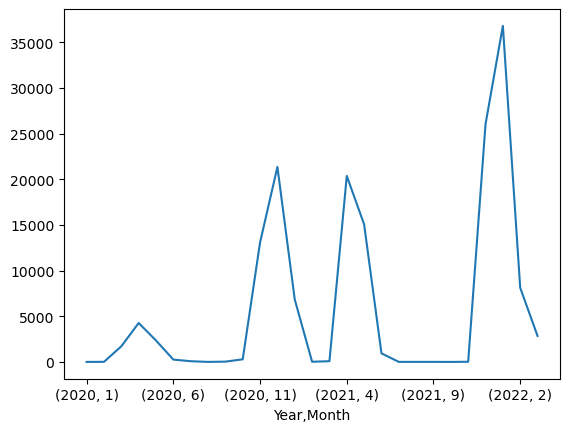

In [284]:
Counts.plot()


1. Create a new groupby object from the original data frame and group this data by "Client Gender".
2. Get a count of the number of patients in each Client Gender category and plot the result on a bar graph. 

**HINT** You can plot the bar graph using the following code.

```
Counts.plot.bar()
plt.ylabel('# of Covid Cases')
plt.title('Covid Cases by Gender in Toronto')
plt.show()
```

In [286]:
grpGender = covid.groupby(['Client Gender'])

Counts = grpGender['_id'].agg(pd.Series.nunique)
Counts.reset_index(name="counts")

,Client Gender,counts
0,FEMALE,84137
1,MALE,75095
2,NON-BINARY,50
3,"NOT LISTED, PLEASE SPECIFY",2
4,OTHER,9
5,TRANS MAN,6
6,TRANS WOMAN,4
7,TRANSGENDER,8
8,UNKNOWN,1294


<AxesSubplot:xlabel='Client Gender'>

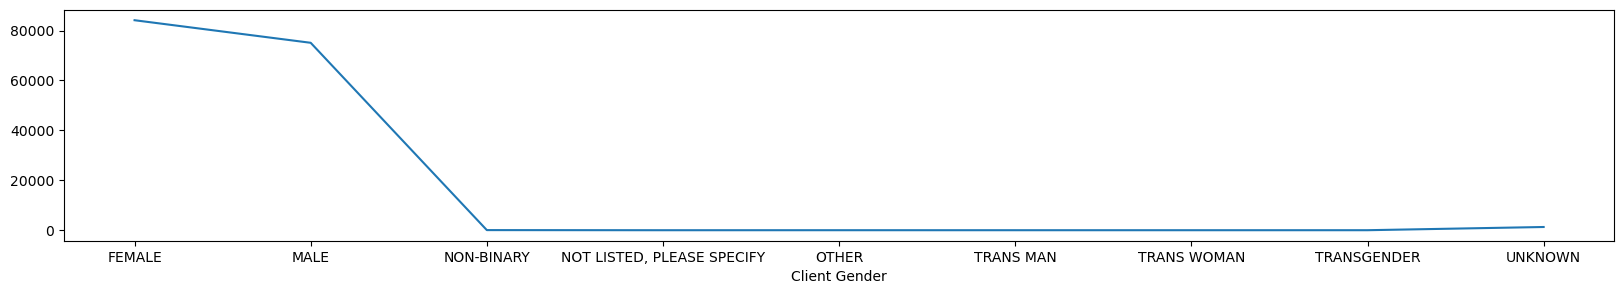

In [290]:
Counts.plot(figsize=(20,3))